**What are the factors that determine house prices in London Boroughs?**

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors7
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn import linear_model

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

import seaborn as sns # Python data visualization library

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



**Importing Data**

In [14]:
# import csv file and show column name with first 5 rows of data
df = pd.read_csv('C:\\Users\\danma\\Documents\\First Project\\London_Data.csv')  
df.head()

,Borough,Average_House_Price_2015,Average_House_Price_2014,Average_Life_Satisfaction,Latitude,Longitude,Population,Number_of_Schools
0,City of London,926292,894046,0.00,51.514241,-0.091011,8760,5
1,Barking and Dagenham,244126,215810,7.45,51.568106,-0.133906,201979,59
2,Barnet,566874,534786,7.53,51.618563,-0.207080,379691,160
3,Bexley,295262,267268,7.41,51.452945,-0.116198,242142,84
4,Brent,506322,468859,7.55,51.567610,-0.271008,324012,100


**Data Wrangling**

In [15]:
#check data types in case any need to be updated
df.dtypes

Borough                       object
Average_House_Price_2015       int64
Average_House_Price_2014       int64
Average_Life_Satisfaction    float64
Latitude                     float64
Longitude                    float64
Population                     int64
Number_of_Schools              int64
dtype: object

In [16]:
#change the data type for Average_Life_Satisfaction to an interger so it behanves correctly in the following code
df['Average_Life_Satisfaction'] = df.Average_Life_Satisfaction.astype(int)
df.dtypes
df.head()

,Borough,Average_House_Price_2015,Average_House_Price_2014,Average_Life_Satisfaction,Latitude,Longitude,Population,Number_of_Schools
0,City of London,926292,894046,0,51.514241,-0.091011,8760,5
1,Barking and Dagenham,244126,215810,7,51.568106,-0.133906,201979,59
2,Barnet,566874,534786,7,51.618563,-0.207080,379691,160
3,Bexley,295262,267268,7,51.452945,-0.116198,242142,84
4,Brent,506322,468859,7,51.567610,-0.271008,324012,100


**Data Visualisation**

In [17]:
# create map of London using latitude and longitude values from google maps nearby fuction
latitude = 51.507340
longitude = -0.127513
map_london = folium.Map(location=[latitude, longitude], zoom_start=10)
for (index, row) in df.iterrows():
    folium.Marker(location=[row.loc['Latitude'], row.loc['Longitude']], popup=row.loc['Borough']).add_to(map_london)
map_london

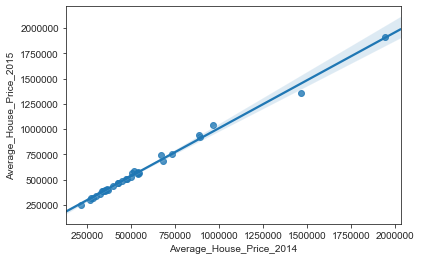

In [18]:
#visualise a scatter plot of the average house prices for 2014 and 2015
sns.set_style('white')
sns.set_style('ticks')
sns.regplot(x='Average_House_Price_2014', y='Average_House_Price_2015', data=df)

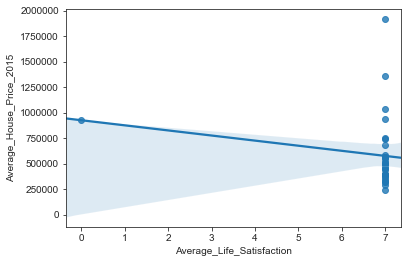

In [19]:
#visualise a scatter plot of the average house prices for 2015 and average life satisfaction
sns.regplot(x='Average_Life_Satisfaction', y='Average_House_Price_2015', data=df)

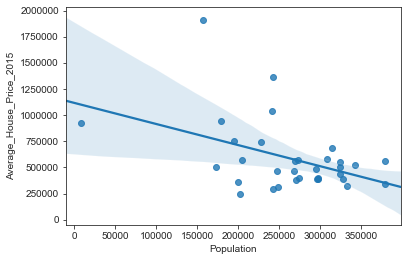

In [20]:
#visualise a scatter plot of the average house prices for 2015 and population
sns.regplot(x='Population', y='Average_House_Price_2015', data=df)

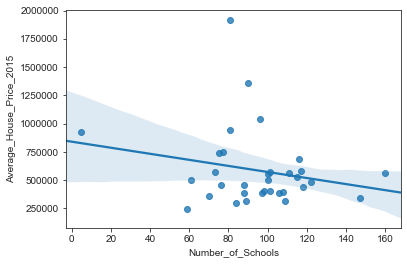

In [21]:
#visualise a scatter plot of the average house prices for 2015 and the number of schools
sns.regplot(x='Number_of_Schools', y='Average_House_Price_2015', data=df)

**Data Analysis**

In [22]:
#complete a multiple linear regression to determine the coefficients of each of the independent variable in relation to the dependent variable
regr = linear_model.LinearRegression()
x = df[['Average_House_Price_2014','Average_Life_Satisfaction', 'Population', 'Number_of_Schools']]
y = df[['Average_House_Price_2015']]
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 9.28538281e-01 -8.48651061e+02 -3.50540899e-01  7.94095987e+02]]
